In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Collection

### df_products Data Description

`df_products`, contains descriptive information about individual products listed on Amazon. Each row represents a unique product identified by its `id`. The columns provide various attributes of these products, which can be used to understand their characteristics and popularity.

Here's a breakdown of each column:

*   **`id`**:
    *   **Data Type**: Integer
    *   **Description**: Unique identifier for each product. This ID is used to link products in the `df_copurchase` DataFrame, acting as the node identifier in the product network.
    *   **Example**: `1`, `2`, `3`, `4`, `5`, ...

*   **`title`**:
    *   **Data Type**: String (Text)
    *   **Description**: The name or title of the product. This provides a textual description of what the product is.
    *   **Example**: "Patterns of Preaching: A Sermon Sampler", "Candlemas: Feast of Flames", etc.

*   **`group`**:
    *   **Data Type**: String (Categorical)
    *   **Description**:  The category or group the product belongs to. This helps in understanding the product type (e.g., Book, Music, DVD, etc.).
    *   **Example**: "Book"

*   **`salesrank`**:
    *   **Data Type**: Float
    *   **Description**: Amazon sales rank of the product. A lower `salesrank` indicates higher sales and popularity. This is a common metric to gauge how well a product is selling on Amazon.
    *   **Example**: `396585.0`, `168596.0`, `1270652.0`, etc.

*   **`review_cnt`**:
    *   **Data Type**: Integer
    *   **Description**:  The number of customer reviews received for the product. A higher `review_cnt` can indicate greater product visibility, popularity, or customer engagement.
    *   **Example**: `2`, `12`, `1`, `1`, `0`, etc.

*   **`downloads`**:
    *   **Data Type**: Integer
    *   **Description**: The number of downloads associated with the product.  The exact meaning might depend on the dataset source. It could represent digital product downloads, or potentially another engagement metric.  In the context of "Book" products in the example, it might represent sample downloads, or perhaps a different type of engagement relevant to the dataset.
    *   **Example**: `2`, `12`, `1`, `1`, `0`, etc.

*   **`rating`**:
    *   **Data Type**: Float
    *   **Description**: The average customer rating of the product, typically on a scale of 0 to 5 (or similar). This reflects the overall customer satisfaction and perceived quality of the product.
    *   **Example**: `5.0`, `4.5`, `5.0`, `4.0`, `0.0`, etc.

In [2]:
df_products = pd.read_csv('products.csv')

df_products.head()

,id,title,group,salesrank,review_cnt,downloads,rating
0,1,Patterns of Preaching: A Sermon Sampler,Book,396585.0,2,2,5.0
1,2,Candlemas: Feast of Flames,Book,168596.0,12,12,4.5
2,3,World War II Allied Fighter Planes Trading Cards,Book,1270652.0,1,1,5.0
3,4,Life Application Bible Commentary: 1 and 2 Tim...,Book,631289.0,1,1,4.0
4,5,Prayers That Avail Much for Business: Executive,Book,455160.0,0,0,0.0


## df_copurchase Data Description
`df_copurchase` represents the co-purchasing relationships between products. Each row signifies a directed relationship: if a customer purchased the product in the `Source` column, they were also likely to purchase the product in the `Target` column.

Here's a breakdown of each column:

*   **`Source`**:
    *   **Data Type**: Integer
    *   **Description**: Identifier of the product that was initially purchased (product ID-X as described in the project description). This column acts as the source node in the co-purchasing graph. It corresponds to the `id` column in the `df_products` DataFrame.
    *   **Example**: `1`, `1`, `1`, `1`, `2`, ...

*   **`Target`**:
    *   **Data Type**: Integer
    *   **Description**: Identifier of the product that was co-purchased with the 'Source' product (product ID-Y). This column acts as the target node in the co-purchasing graph. It also corresponds to the `id` column in the `df_products` DataFrame.
    *   **Example**: `2`, `4`, `5`, `15`, `11`, ...

In [3]:
df_copurchase = pd.read_csv('copurchase.csv')

df_copurchase.head()

,Source,Target
0,1,2
1,1,4
2,1,5
3,1,15
4,2,11


## Data Exploration

**Pertanyaan untuk df_products:**
1. Correlation Matrix antara salesrank, review count, download, rating

**Pertanyaan untuk df_copurchase:**
1. Jumlah row dalam df_copurchase
   * Berapa banyak total hubungan co-purchasing yang ada dalam dataset? Ini adalah jumlah baris dalam df_copurchase.
2. Top-5 produk yang paling banyak menjadi co-purchasing (source) (out-degree)
   * Produk mana yang paling sering menjadi "Source" dalam df_copurchase? Ini mengindikasikan produk mana yang pembeliannya paling sering diikuti dengan pembelian produk lain. Hitung out-degree setiap node (produk).
   * Visualisasikan top produk dengan out-degree tertinggi (misalnya dengan bar chart).
3. Top-5 produk yang paling banyak di co-purchase (target) (in-degree)
   * Produk mana yang paling sering menjadi "Target" dalam df_copurchase? Ini mengindikasikan produk mana yang paling sering dibeli bersamaan dengan produk lain. Hitung in-degree setiap node (produk).
   * Visualisasikan top produk dengan in-degree tertinggi (misalnya dengan bar chart).
4. Distribusi In-degree (di-copurchase) dan Out-degree (co-purchasing)
   * Contohnya, untuk in-degree, bagaimana distribusinya (node dengan in-degree 0 ada berapa, 1 ada berapa, etc.)
   * Visualisasikan
5. Produk yang tidak pernah masuk ke df_copurchase (cek source, target, atau keduanya)
   * Identifikasi produk-produk yang tidak muncul sebagai "Source" atau "Target" dalam df_copurchase. Produk-produk ini tidak memiliki hubungan co-purchasing dalam dataset.
   * Apakah ada karakteristik khusus dari produk-produk ini (misalnya group, salesrank, dll.)?

**Pertanyaan untuk keduanya:**
1. Hitung in-degree dan out-degree untuk masing-masing produk, kemudian gabungkan ke df_products dan hitung korelasi antara
   salesrank, review count, download, rating, in-degree, out-degree
   * Gunakan scatter plot atau boxplot untuk visualisasi dan hitung korelasi jika relevan.
2. Hitung statistics co-purchsing (in-degree, out-degree) untuk masing-masing group.
3. Hitung konektivitas untuk masing-masing group (e.g., jumlah koneksi out-degree dan in-degree dalam group dan keluar group)
4. Hitung hubungan antar group (e.g., untuk group A, hitung out-degree ke group B, C, D, dst dan
   in-degree dari group B, C, D, dst. ke group A) 

---

EDA Andi

1. Jumlah row dalam df_copurchase
   * Berapa banyak total hubungan co-purchasing yang ada dalam dataset? Ini adalah jumlah baris dalam df_copurchase.

2. Produk yang tidak pernah masuk ke df_copurchase (cek source, target, atau keduanya)
   * Identifikasi produk-produk yang tidak muncul sebagai "Source" atau "Target" dalam df_copurchase. Produk-produk ini tidak memiliki hubungan co-purchasing dalam dataset.
   * Apakah ada karakteristik khusus dari produk-produk ini (misalnya group, salesrank, dll.)?

---

1. Jumlah row dalam df_copurchase
   * Berapa banyak total hubungan co-purchasing yang ada dalam dataset? Ini adalah jumlah baris dalam df_copurchase.

In [4]:
len(df_copurchase)

1234870

2. Produk yang tidak pernah masuk ke df_copurchase (cek source, target, atau keduanya)
   * Identifikasi produk-produk yang tidak muncul sebagai "Source" atau "Target" dalam df_copurchase. Produk-produk ini tidak memiliki hubungan co-purchasing dalam dataset.
   * Apakah ada karakteristik khusus dari produk-produk ini (misalnya group, salesrank, dll.)?

In [14]:
id_set = set(df_products['id'])
copurchase_source_set = set(df_copurchase['Source'])
copurchase_target_set = set(df_copurchase['Target'])
copurchase_target_and_source_set = copurchase_source_set.union(copurchase_target_set)

len(id_set), len(copurchase_source_set), len(copurchase_target_set), len(copurchase_target_and_source_set)

(259167, 257569, 262108, 262110)

Ternyata, ada banyak produk yang masuk ke co-purchase dataframe tapi tidak ada datanya di products dataframe.

In [16]:
copurchase_target_and_source_set.difference(id_set)

{106502,
 229391,
 204817,
 147475,
 188436,
 32791,
 163866,
 172058,
 188446,
 221214,
 73762,
 98339,
 8229,
 180262,
 221221,
 221224,
 188458,
 253998,
 155695,
 204848,
 65590,
 65592,
 204856,
 172090,
 204857,
 204858,
 204859,
 32830,
 147519,
 155710,
 172095,
 204860,
 204862,
 204864,
 114757,
 114763,
 98380,
 16461,
 114765,
 16463,
 16464,
 196684,
 16466,
 16468,
 16469,
 16471,
 172119,
 204890,
 180317,
 221284,
 254056,
 122985,
 147563,
 73836,
 106605,
 147566,
 90230,
 16507,
 16510,
 172160,
 254080,
 8322,
 172163,
 254089,
 73867,
 188560,
 180373,
 196760,
 49305,
 147609,
 196761,
 163997,
 237726,
 188576,
 57506,
 24739,
 155811,
 24741,
 221353,
 204970,
 82095,
 82096,
 65714,
 237747,
 139450,
 98494,
 147654,
 147659,
 147660,
 98509,
 237778,
 245976,
 106716,
 188636,
 90336,
 24801,
 57570,
 172258,
 82148,
 205028,
 229605,
 155883,
 213228,
 16622,
 254191,
 254196,
 33013,
 214975,
 237818,
 73986,
 49422,
 205071,
 16659,
 172307,
 114968,
 13136

In [19]:
ids_not_in_copurchase = id_set - copurchase_target_and_source_set
ids_not_in_copurchase = list(ids_not_in_copurchase)
ids_not_in_source_set = id_set - copurchase_source_set
ids_not_in_source_set = list(ids_not_in_source_set)
ids_not_in_target_set = id_set - copurchase_target_set
ids_not_in_target_set = list(ids_not_in_target_set)

print(f"Number of products not in copurchase: {df_products['id'].isin(ids_not_in_copurchase).sum()}")
print(f"Number of products not in source set: {df_products['id'].isin(ids_not_in_source_set).sum()}")
print(f"Number of products not in target set: {df_products['id'].isin(ids_not_in_target_set).sum()}")

Number of products not in copurchase: 0
Number of products not in source set: 4498
Number of products not in target set: 2


In [21]:
df_product_not_in_source = df_products[df_products['id'].isin(ids_not_in_source_set)]

df_product_not_in_target = df_products[df_products['id'].isin(ids_not_in_target_set)]

,id,salesrank,review_cnt,downloads,rating
count,4498.000000,4.498000e+03,4498.000000,4498.000000,4498.000000
mean,125751.353268,5.008037e+05,13.276345,13.182748,3.138951
std,81875.753261,5.857637e+05,51.565032,51.410507,2.030436
min,9.000000,-1.000000e+00,0.000000,0.000000,0.000000
25%,57594.250000,9.625275e+04,0.000000,0.000000,0.000000
50%,106080.500000,3.029205e+05,2.000000,2.000000,4.000000
75%,210240.250000,6.690218e+05,8.000000,8.000000,5.000000
max,262096.000000,3.523759e+06,1447.000000,1435.000000,5.000000


c:\Python311\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


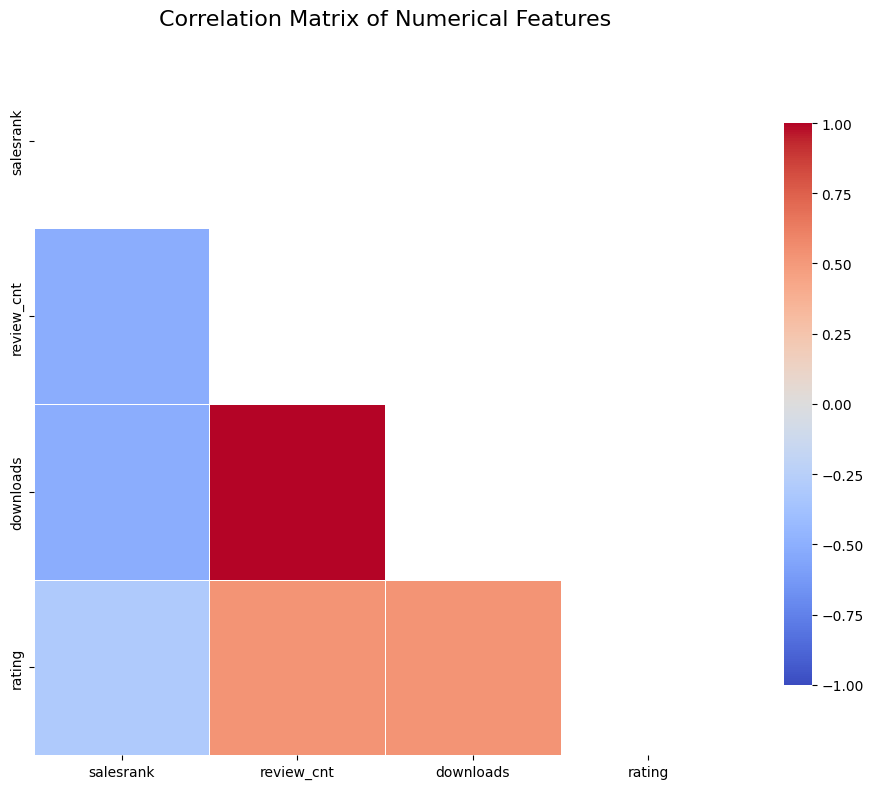

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

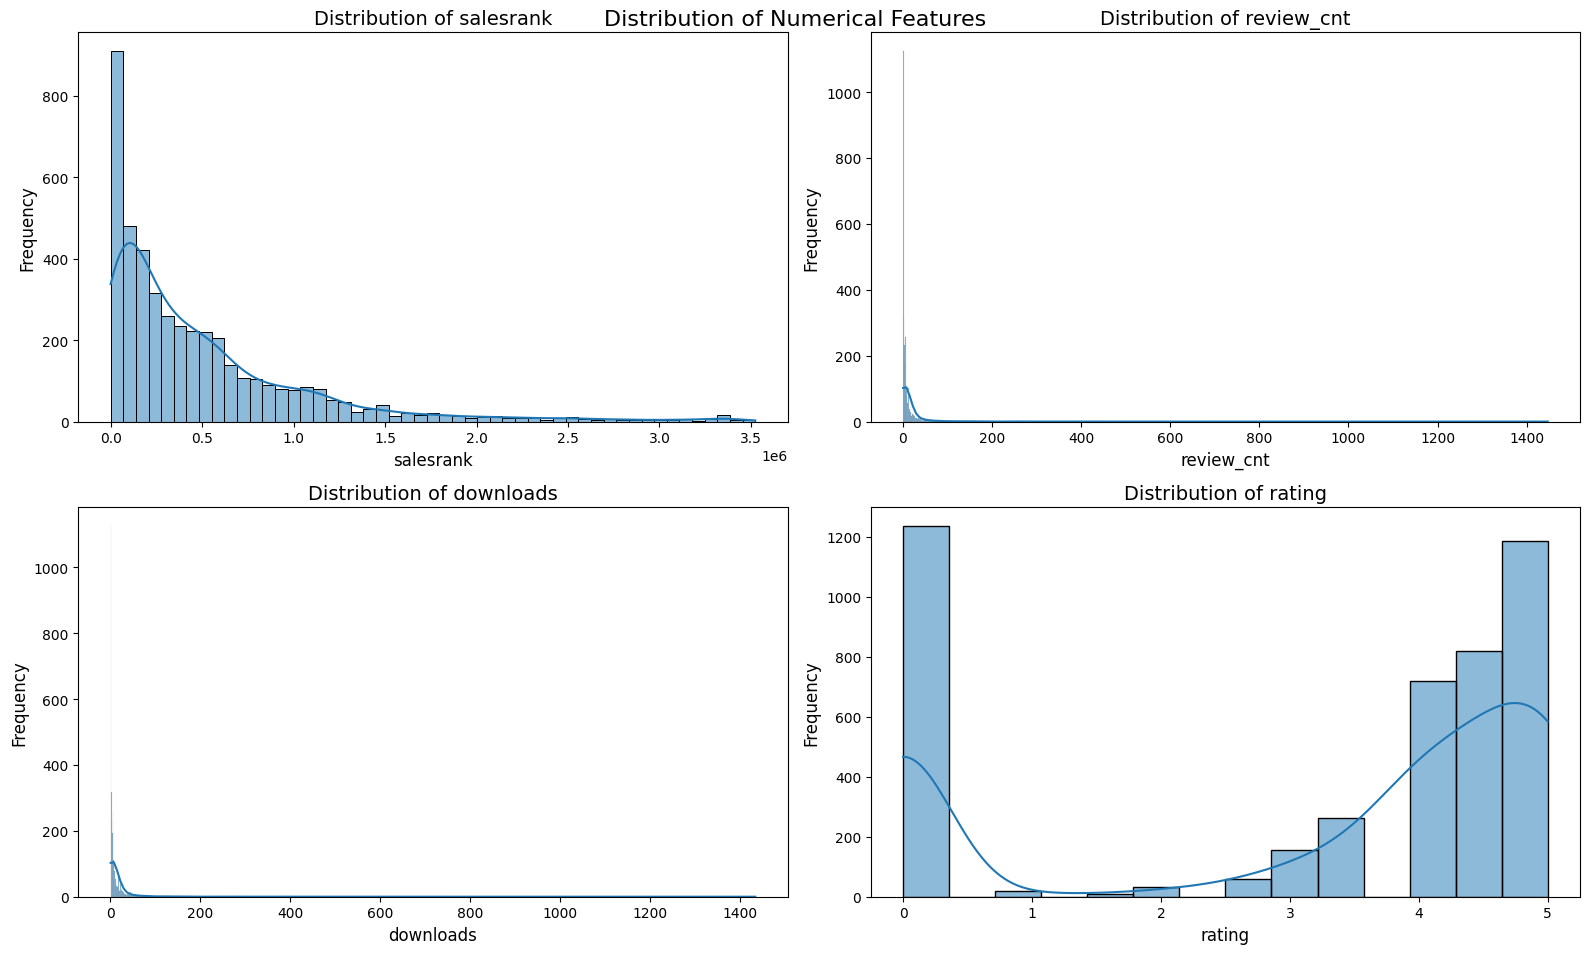

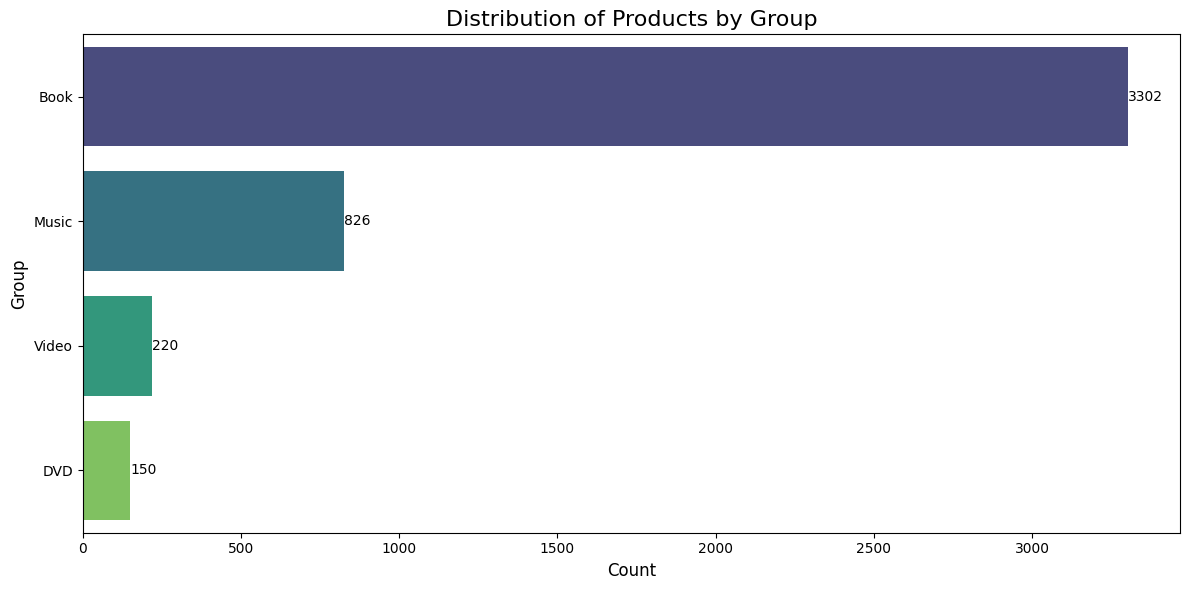

In [47]:
num_cols = ['salesrank', 'review_cnt', 'downloads', 'rating']

display(df_product_not_in_source.describe())

plt.figure(figsize=(10, 8))
corr_matrix = df_product_not_in_source[num_cols].corr(method='spearman')
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, 
           mask=mask,
           annot=True, 
           cmap='coolwarm', 
           vmin=-1, 
           vmax=1, 
           center=0,
           square=True,
           linewidths=.5,
           cbar_kws={'shrink': .8})
plt.title('Correlation Matrix of Numerical Features', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# 3. Distribution of numerical features
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Distribution of Numerical Features', fontsize=16, y=0.95)
axes = axes.flatten()

for i, col in enumerate(num_cols):
    # Filter out non-positive values for log scale columns (except rating)
    if col != 'rating':
        # Only plot positive values for log scale
        valid_data = df_product_not_in_source[df_product_not_in_source[col] > 0][col]
        sns.histplot(valid_data, kde=True, ax=axes[i])
        # axes[i].set_yscale('log') 
        axes[i].set_title(f'Distribution of {col}', fontsize=14)
        axes[i].set_ylabel('Frequency', fontsize=12)
    else:
        # For rating, keep linear scale
        sns.histplot(df_product_not_in_source[col], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}', fontsize=14)
        axes[i].set_ylabel('Frequency', fontsize=12)
    
    axes[i].set_xlabel(col, fontsize=12)
    

plt.tight_layout()
plt.show()

# 4. Group value counts visualization
plt.figure(figsize=(12, 6))
group_counts = df_product_not_in_source['group'].value_counts()

ax = sns.barplot(x=group_counts.values, y=group_counts.index, palette='viridis')

for i, v in enumerate(group_counts.values):
    ax.text(v + 0.1, i, str(v), va='center')
    
plt.title('Distribution of Products by Group', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Group', fontsize=12)
plt.tight_layout()
plt.show()

,id,salesrank,review_cnt,downloads,rating
count,2.000000,2.000000e+00,2.000000,2.000000,2.0
mean,2.000000,8.336185e+05,1.500000,1.500000,5.0
std,1.414214,6.180587e+05,0.707107,0.707107,0.0
min,1.000000,3.965850e+05,1.000000,1.000000,5.0
25%,1.500000,6.151018e+05,1.250000,1.250000,5.0
50%,2.000000,8.336185e+05,1.500000,1.500000,5.0
75%,2.500000,1.052135e+06,1.750000,1.750000,5.0
max,3.000000,1.270652e+06,2.000000,2.000000,5.0


c:\Python311\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


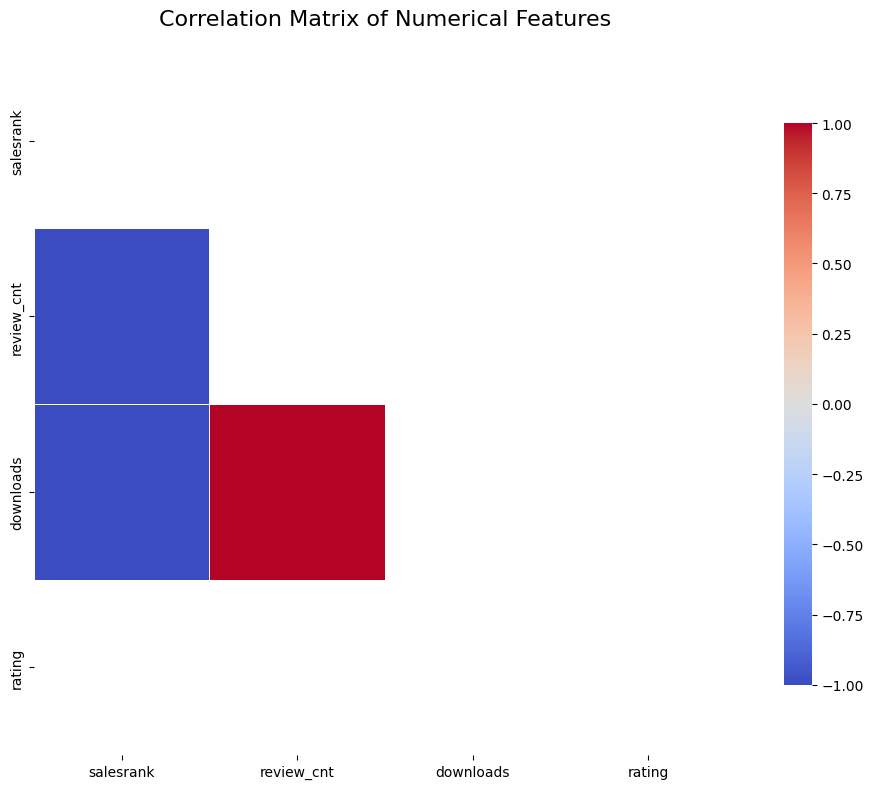

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

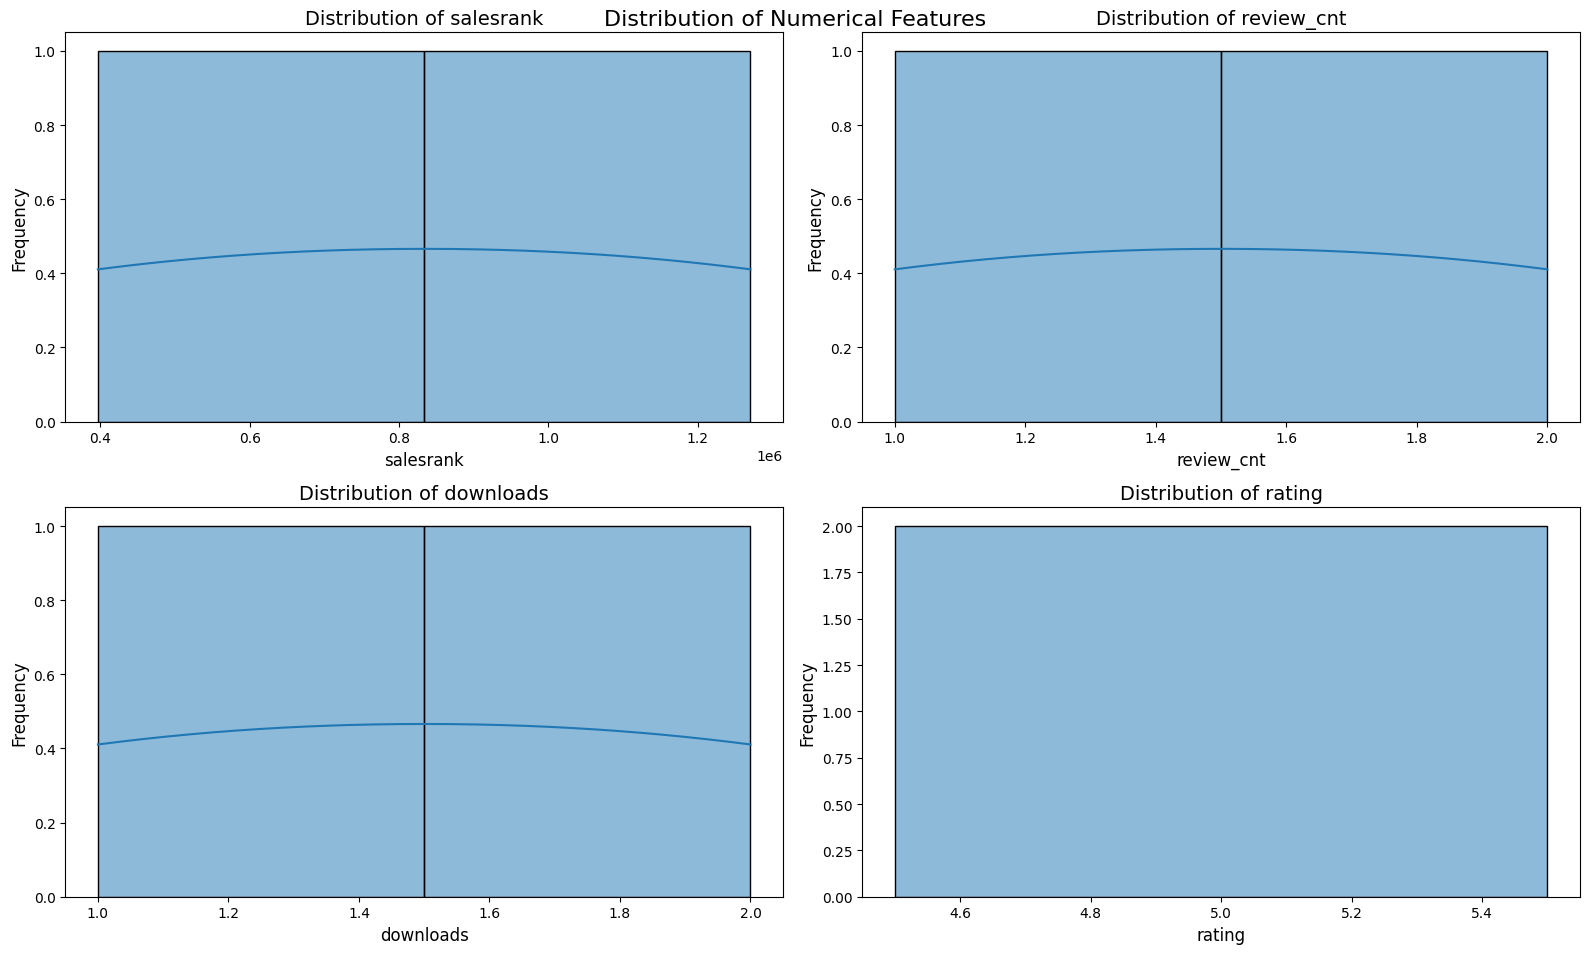

c:\Python311\Lib\site-packages\seaborn\categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


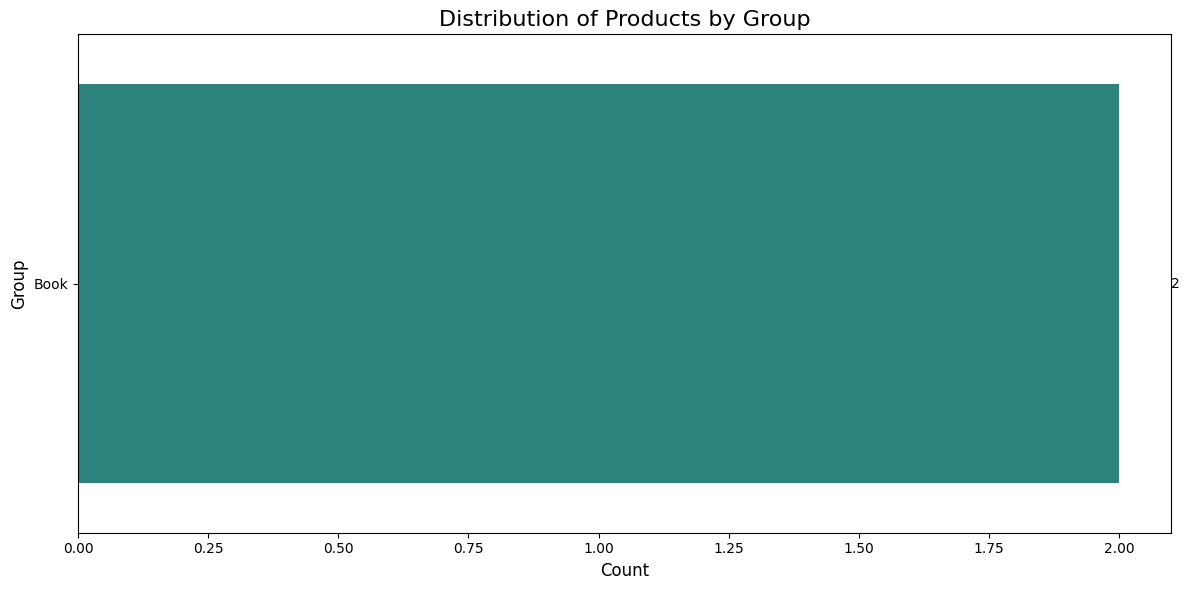

In [48]:
num_cols = ['salesrank', 'review_cnt', 'downloads', 'rating']

display(df_product_not_in_target.describe())

plt.figure(figsize=(10, 8))
corr_matrix = df_product_not_in_target[num_cols].corr(method='spearman')
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, 
           mask=mask,
           annot=True, 
           cmap='coolwarm', 
           vmin=-1, 
           vmax=1, 
           center=0,
           square=True,
           linewidths=.5,
           cbar_kws={'shrink': .8})
plt.title('Correlation Matrix of Numerical Features', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# 3. Distribution of numerical features
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Distribution of Numerical Features', fontsize=16, y=0.95)
axes = axes.flatten()

for i, col in enumerate(num_cols):
    # Filter out non-positive values for log scale columns (except rating)
    if col != 'rating':
        # Only plot positive values for log scale
        valid_data = df_product_not_in_target[df_product_not_in_target[col] > 0][col]
        sns.histplot(valid_data, kde=True, ax=axes[i])
        # axes[i].set_yscale('log') 
        axes[i].set_title(f'Distribution of {col}', fontsize=14)
        axes[i].set_ylabel('Frequency', fontsize=12)
    else:
        # For rating, keep linear scale
        sns.histplot(df_product_not_in_target[col], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}', fontsize=14)
        axes[i].set_ylabel('Frequency', fontsize=12)
    
    axes[i].set_xlabel(col, fontsize=12)
    

plt.tight_layout()
plt.show()

# 4. Group value counts visualization
plt.figure(figsize=(12, 6))
group_counts = df_product_not_in_target['group'].value_counts()

ax = sns.barplot(x=group_counts.values, y=group_counts.index, palette='viridis')

for i, v in enumerate(group_counts.values):
    ax.text(v + 0.1, i, str(v), va='center')
    
plt.title('Distribution of Products by Group', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Group', fontsize=12)
plt.tight_layout()
plt.show()


#### Jumlah Produk yang Tidak Berpartisipasi
- **0 produk** yang tidak muncul sama sekali dalam co-purchase (semua produk muncul minimal sebagai source atau target)
- **4.498 produk** tidak pernah menjadi "Source" dalam hubungan co-purchase
- **Hanya 2 produk** yang tidak pernah menjadi "Target" dalam hubungan co-purchase

#### Karakteristik Produk yang Tidak Pernah Menjadi Source
1. **Distribusi Group**: 
   - Didominasi oleh produk kategori "Book"
   - Hal ini menunjukkan bahwa buku-buku tertentu jarang menjadi titik awal rekomendasi co-purchase

2. **Peringkat Penjualan (Salesrank)**:
   - Distribusi salesrank sangat skewed dengan beberapa produk memiliki peringkat penjualan yang sangat tinggi
   - Produk-produk ini cenderung memiliki salesrank yang lebih buruk (angka lebih tinggi) dibandingkan rata-rata produk
   - Ini mengindikasikan produk-produk yang tidak populer jarang menjadi pemicu pembelian produk lain

3. **Jumlah Review dan Downloads**:
   - Sebagian besar memiliki jumlah review dan downloads yang sangat rendah
   - Terdapat korelasi positif antara review_cnt dan downloads
   - Produk dengan engagement rendah (review dan downloads sedikit) cenderung tidak mendorong co-purchase

4. **Rating**:
   - Distribusi rating menunjukkan polarisasi, banyak produk dengan rating sangat rendah atau sangat tinggi
   - Banyak produk tanpa rating (rating = 0)

Analisis ini menunjukkan bahwa popularitas dan engagement produk sangat mempengaruhi kemampuannya untuk menjadi trigger dalam pembelian produk lain.